# Comparison gps/argos, cutoff, drogue/undrogue
For gps+argos, drogued, <25km, <30min

In [6]:
import numpy as np
import pandas as pd
import xarray as xr

import dask.dataframe as dd
import os
from glob import glob

import matplotlib.pyplot as plt

import histlib.matchup as match
from  histlib.diagnosis import build_matchup_dataframe, synthetic_figure, path_csv, put_fig_letter
from histlib.cstes import labels, zarr_dir, matchup_dir, c0
plt.rcParams["axes.edgecolor"] = "w"

In [5]:
DL, DT = 25e3, 30*60
comb_25 = {'acc':'drifter_acc_x_25','cor':'drifter_coriolis_x_25','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}

df_alg = pd.read_csv(path_csv(comb_25, 'both', True, DL, DT))

dfgps = df_alg.where(df_alg.drifter_type == 'gps').mean()
dfargos = df_alg.where(df_alg.drifter_type == 'argos').mean()

FileNotFoundError: [Errno 2] No such file or directory: '/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/analysis_files/drogued__bothgpsargos__25000km__30min__drifter_acc_x_25__drifter_coriolis_x_25__alti_ggx_adt_filtered_ocean_tide_internal_tide__es_cstrio_z15_drifter_wd_x.csv'

_______
## GPS/ARGOS

8.069896967622922e-10
8.296488071207359e-10
8.065626967946749e-10
8.286751005744821e-10


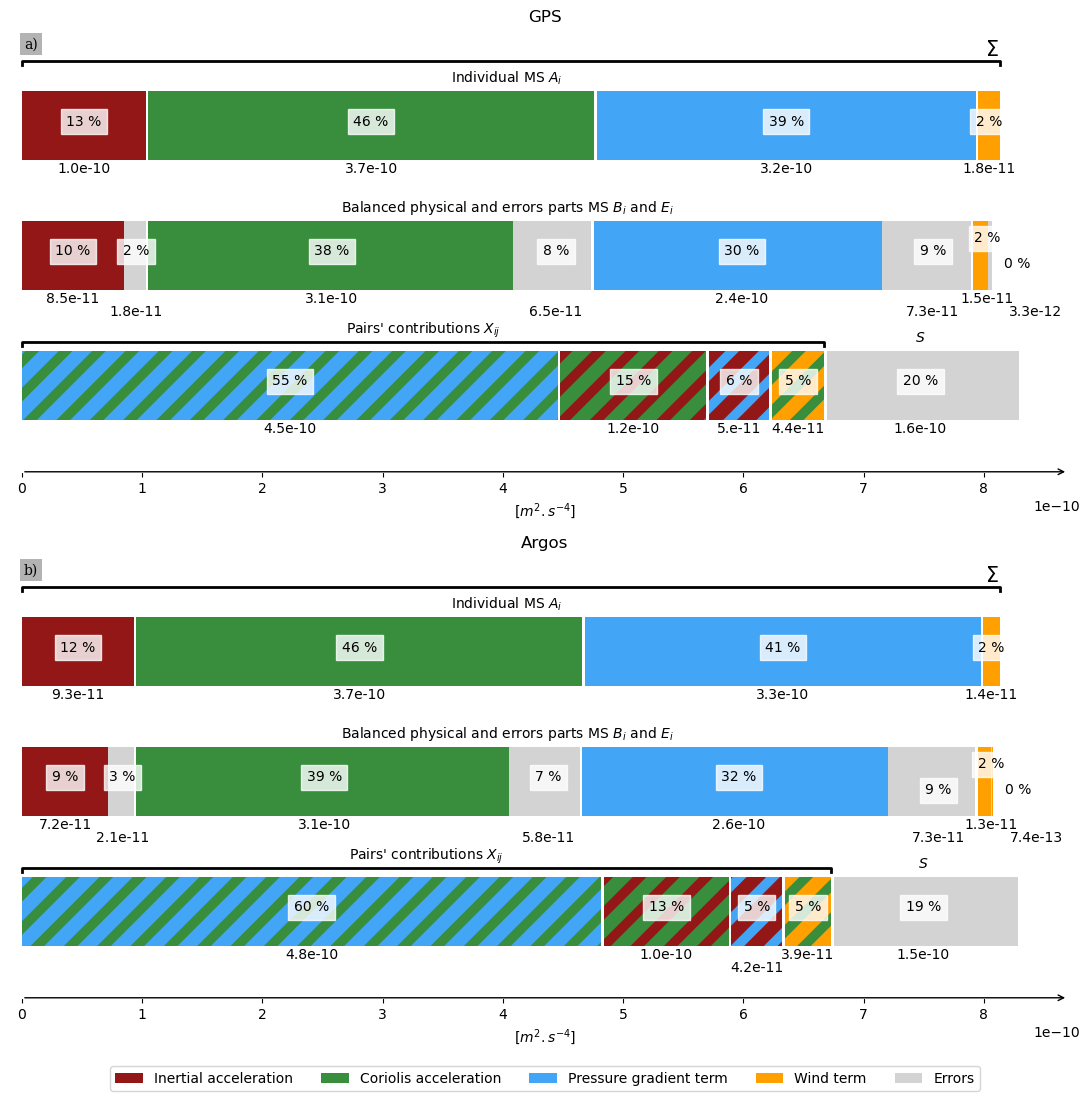

In [27]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(11,11), frameon=False, )
plt.rcParams["axes.edgecolor"] = "w"

synthetic_figure(dfgps, axs[0], xlim=8.7e-10) 
synthetic_figure(dfargos, axs[1], xlim=8.7e-10, aviso=True) 

axs[0].set_title('GPS')
axs[1].set_title('Argos')

handles, labels = axs[0].get_legend_handles_labels()

put_fig_letter(fig, axs[0], 'a')
put_fig_letter(fig, axs[1], 'b')
fig.legend(handles, labels, ncol=5,loc='lower center')
fig.tight_layout(rect=[0,0.03,1,1])#left, bottom, right, top (default is 0,0,1,1)
#fig.savefig('../images_all/synth_samex_alti.png',bbox_inches='tight',   dpi=300)
#fig.savefig('../images_all/synth_samex_alti.jpeg',bbox_inches='tight',   dpi=300)

_______
## Drogued/undrogued

In [28]:
dfdrogued = df_alg.mean()
dfundrogued =pd.read_csv(path(comb_25, 'both', False, DL, DT)).mean()

UnboundLocalError: local variable 'dr_st' referenced before assignment

8.069896967622922e-10
8.296488071207359e-10
8.065626967946749e-10
8.286751005744821e-10


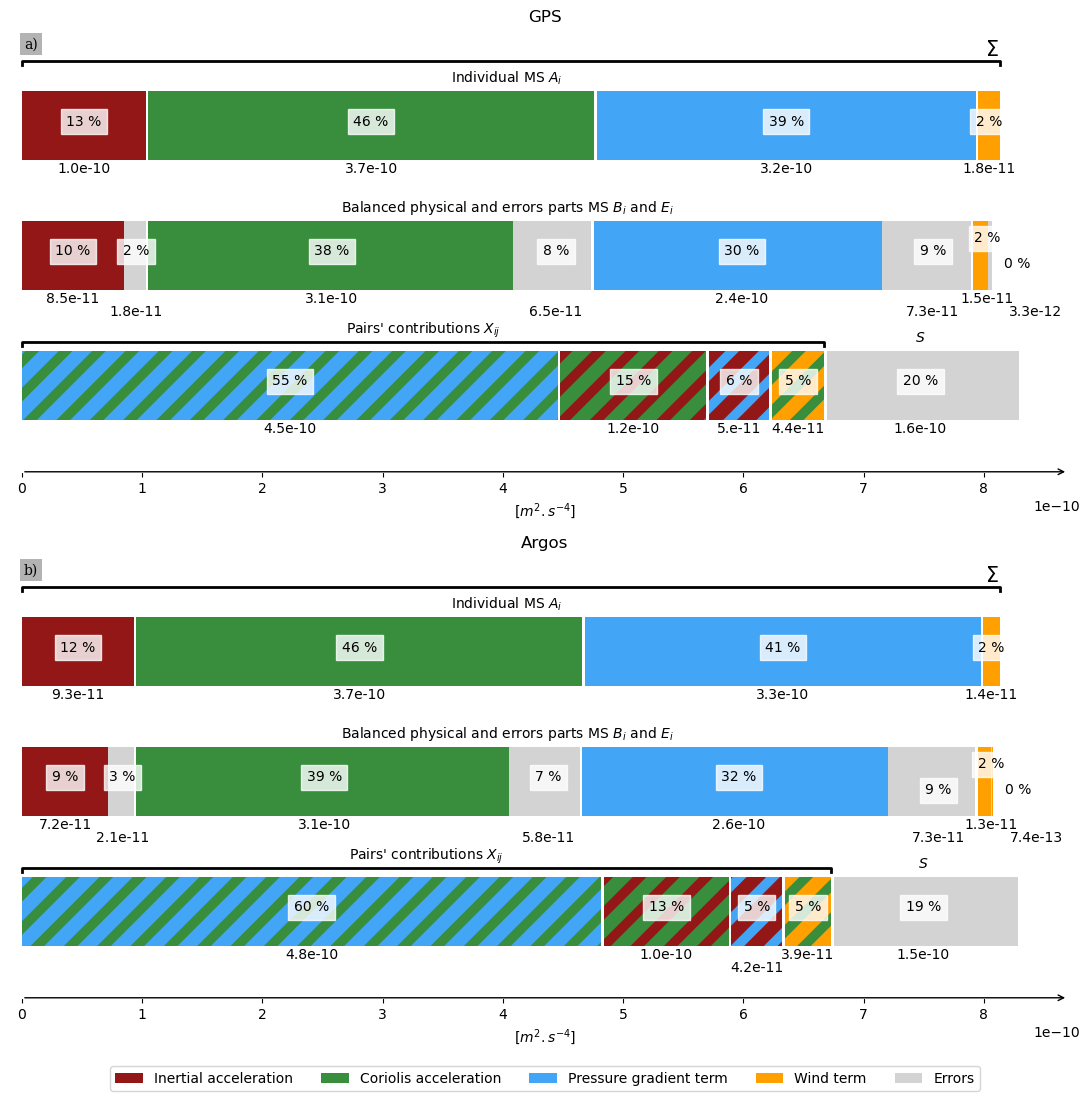

In [27]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(11,11), frameon=False, )

synthetic_figure(dfdrogued, axs[0], xlim=8.7e-10) 
synthetic_figure(dfundrogued, axs[1], xlim=8.7e-10, aviso=True) 

axs[0].set_title('Drogued')
axs[1].set_title('Undrogued')

handles, labels = axs[0].get_legend_handles_labels()

put_fig_letter(fig, axs[0], 'a')
put_fig_letter(fig, axs[1], 'b')
fig.legend(handles, labels, ncol=5,loc='lower center')
fig.tight_layout(rect=[0,0.03,1,1])#left, bottom, right, top (default is 0,0,1,1)
#fig.savefig('../images_all/synth_samex_alti.png',bbox_inches='tight',   dpi=300)
#fig.savefig('../images_all/synth_samex_alti.jpeg',bbox_inches='tight',   dpi=300)

_______
## Cutoff drifters low pass

In [2]:
#cutoff
df25 = df_drogued

comb_25 = {'acc':'drifter_acc_x_25','cor':'drifter_coriolis_x_25','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}
comb_15 = {'acc':'drifter_acc_x_15','cor':'drifter_coriolis_x_15','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}
comb_05 = {'acc':'drifter_acc_x_05','cor':'drifter_coriolis_x_05','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}
comb_no = {'acc':'drifter_acc_x_00','cor':'drifter_coriolis_x_00','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}



NameError: name 'select' is not defined

8.068252038712496e-10


NameError: name 'aviso' is not defined

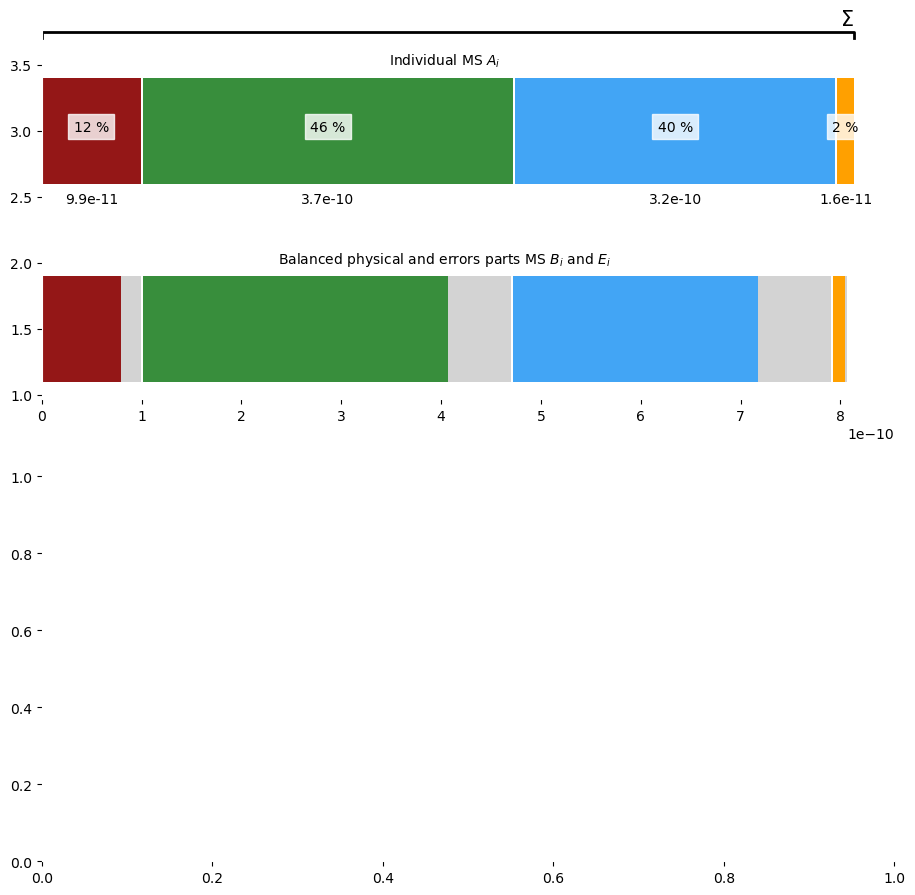

In [14]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(11,11), frameon=False, )
plt.rcParams["axes.edgecolor"] = "w"

synthetic_figure(df_alg.mean(), axs[0], xlim=8.7e-10) 
synthetic_figure(df_av_al.mean(), axs[1], xlim=8.7e-10, aviso=True) 

axs[0].set_title('Along-track')
axs[1].set_title('AVISO altimeter')

handles, labels = axs[0].get_legend_handles_labels()

put_fig_letter(axs[0], 'a')
put_fig_letter(axs[1], 'b')
fig.legend(handles, labels, ncol=5,loc='lower center')
fig.tight_layout(rect=[0,0.03,1,1])#left, bottom, right, top (default is 0,0,1,1)
fig.savefig('../images_all/synth_samex_alti.png',bbox_inches='tight',   dpi=300)
fig.savefig('../images_all/synth_samex_alti.jpeg',bbox_inches='tight',   dpi=300)

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(11,11), frameon=False, )
plt.rcParams["axes.edgecolor"] = "w"

synthetic_figure(df_alg.mean(), axs[0], xlim=8.7e-10) 
synthetic_figure(df_av_d.mean(), axs[1], xlim=8.7e-10) 

axs[0].set_title('Along-track')
axs[1].set_title('AVISO drifter')

handles, labels = axs[0].get_legend_handles_labels()

put_fig_letter(axs[0], 'a')
put_fig_letter(axs[1], 'b')
fig.legend(handles, labels, ncol=5,loc='lower center')
fig.tight_layout(rect=[0,0.03,1,1])#left, bottom, right, top (default is 0,0,1,1)
fig.savefig('../images_all/synth_samex.png',bbox_inches='tight',   dpi=300)
fig.savefig('../images_all/synth_samex.jpeg',bbox_inches='tight',   dpi=300)